In [1]:
# Import all the basic required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading csv file in dataframe

df = pd.read_csv('crop_yield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708.0,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685.0,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22.0,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000.0,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794.0,2051.4,165500.63,539.09,0.420909


In [3]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968800e+04,1.968700e+04,19689.000000,1.968700e+04,1.968900e+04,19689.000000
mean,2009.127228,1.799339e+05,1.643761e+07,1437.750982,2.410583e+07,4.884965e+04,79.954136
std,6.498102,7.328464e+05,2.630701e+08,816.864403,9.495050e+07,2.132871e+05,878.306181
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.392000e+03,1.396000e+03,940.700000,1.882388e+05,3.574800e+02,0.600000
50%,2010.000000,9.318500e+03,1.380500e+04,1247.000000,1.235608e+06,2.422860e+03,1.030417
75%,2015.000000,7.506775e+04,1.227410e+05,1643.700000,1.001394e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


# Exploratory Data Analysis(EDA)

In [4]:
# Check the number of rows and columns

df.shape

(19689, 10)

In [5]:
# Check the missing values in dataset

df.isnull().sum()

Crop               1
Crop_Year          0
Season             2
State              1
Area               1
Production         2
Annual_Rainfall    0
Fertilizer         2
Pesticide          0
Yield              0
dtype: int64

In [6]:
# Check the data types

df.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production         float64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

In [7]:
# Fill missing values in the 'Object' columns with mode() function

df['Crop'] = df['Crop'].fillna(df['Crop'].mode()[0])
df['Season'] = df['Season'].fillna(df['Season'].mode()[0])
df['State'] = df['State'].fillna(df['State'].mode()[0])

In [8]:
# Fill missing values in the 'Numeric' columns with mean() function

df['Area'] = df['Area'].fillna(df['Area'].mean())
df['Production'] = df['Production'].fillna(df['Production'].mean())
df['Fertilizer'] = df['Fertilizer'].fillna(df['Fertilizer'].mean())

In [9]:
# Check the missing values in dataset

df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [10]:
# Check the duplicates in dataset

df.duplicated().sum()

4

In [11]:
# Remove duplicates values

df.drop_duplicates(inplace = True)

In [12]:
# Check the duplicates in dataset

df.duplicated().sum()

0

In [13]:
df.shape # Check the rows and columns

(19685, 10)

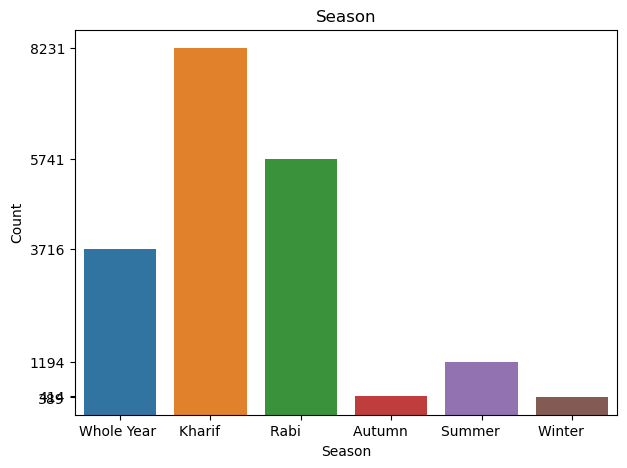

In [14]:
# Visualization

season = df['Season'].value_counts()
plt.figure(figsize = (7,5))
sns.countplot(data = df, x = 'Season')
plt.yticks(season)
plt.title('Season')
plt.ylabel('Count')
plt.show()

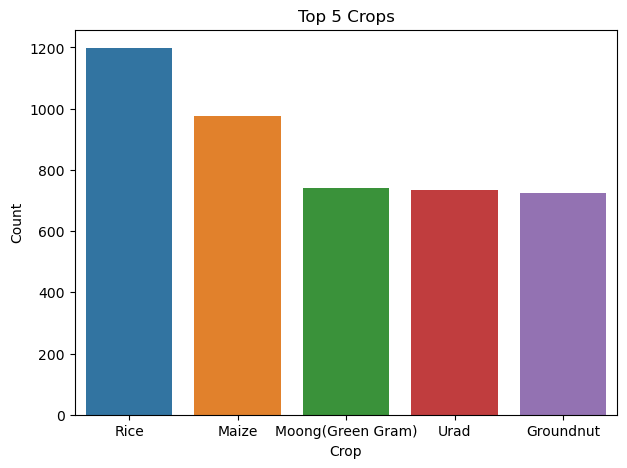

In [15]:
# Assuming df is your DataFrame and 'Crop' is the column of interest

# Compute the counts of each crop
crop_counts = df['Crop'].value_counts()

# Identify the top 5 crops
top_5_crops = crop_counts.head(5).index

# Filter the DataFrame to include only the top 5 crops
df_top_5 = df[df['Crop'].isin(top_5_crops)]

# Create the plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df_top_5, x='Crop', order=top_5_crops)

# Optionally, you can add title and labels
plt.title('Top 5 Crops')
plt.xlabel('Crop')
plt.ylabel('Count')

plt.show()

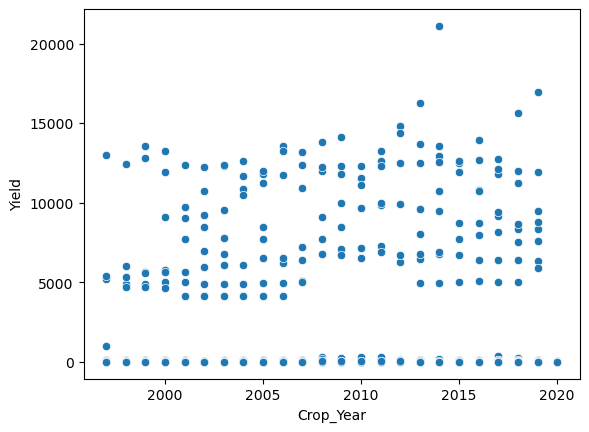

In [16]:
# Check the relation between independent and dependent variable using scatterplot.

sns.scatterplot(data = df, x = 'Crop_Year', y = 'Yield')
plt.show()

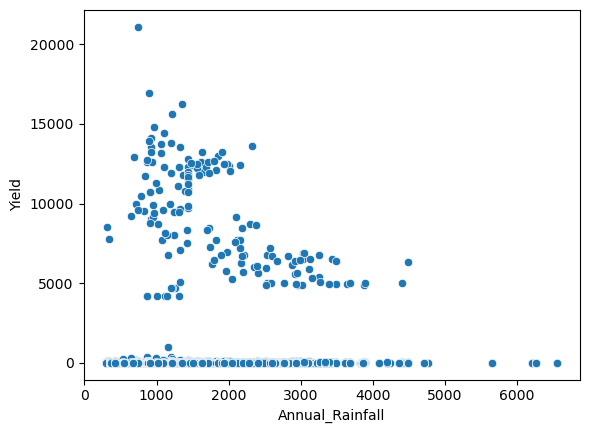

In [17]:
# Check the relation between independent and dependent variable using scatterplot.

sns.scatterplot(data = df, x = 'Annual_Rainfall', y = 'Yield')
plt.show()

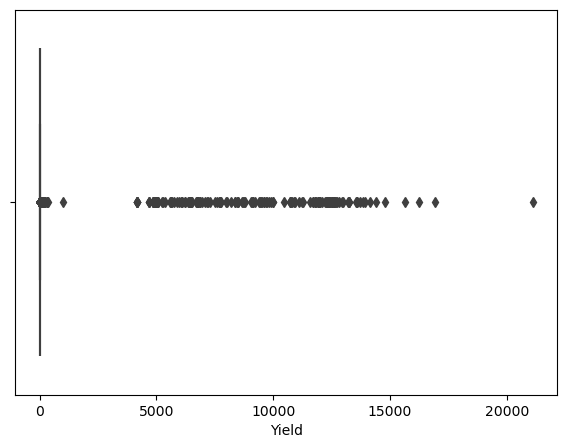

In [18]:
# Check the outliers.

plt.figure(figsize = (7,5))
sns.boxplot(data=df,x='Yield')
plt.show()

In [19]:
# Apply LabelEncoder() to convert string type data into numeric

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
obj_cols = ['Crop', 'Season', 'State']
for cols in obj_cols:
    df[cols] = le.fit_transform(df[cols])
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,1997,4,2,73814.0,56708.0,2051.4,7024878.38,22882.34,0.796087
1,1,1997,1,2,6637.0,4685.0,2051.4,631643.29,2057.47,0.710435
2,8,1997,1,2,796.0,22.0,2051.4,75755.32,246.76,0.238333
3,9,1997,4,2,19656.0,126905000.0,2051.4,1870661.52,6093.36,5238.051739
4,11,1997,1,2,1739.0,794.0,2051.4,165500.63,539.09,0.420909


In [20]:
# Check the data types

df.dtypes

Crop                 int32
Crop_Year            int64
Season               int32
State                int32
Area               float64
Production         float64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

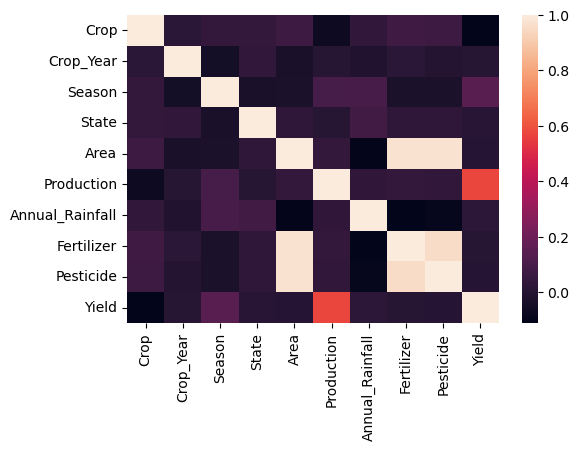

In [21]:
# Visualizing Corr relation between input features and Target variable

plt.figure(figsize = (6,4))
sns.heatmap(data = df.corr())
plt.show()

In [22]:
df.corr() # Check Correlation

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop,1.000000,0.010893,0.037391,0.038734,0.071117,-0.075909,0.033543,0.074693,0.066413,-0.110911
Crop_Year,0.010893,1.000000,-0.053659,0.035503,-0.035679,0.003361,-0.011163,0.011181,-0.004642,0.002545
Season,0.037391,-0.053659,1.000000,-0.036835,-0.031357,0.096873,0.099370,-0.031778,-0.030584,0.141812
State,0.038734,0.035503,-0.036835,1.000000,0.027018,0.003924,0.083843,0.026958,0.027658,0.009672
Area,0.071117,-0.035679,-0.031357,0.027018,1.000000,0.037436,-0.106039,0.973253,0.973478,0.001854
Production,-0.075909,0.003361,0.096873,0.003924,0.037436,1.000000,0.029886,0.039793,0.035168,0.570808
Annual_Rainfall,0.033543,-0.011163,0.099370,0.083843,-0.106039,0.029886,1.000000,-0.109748,-0.097673,0.020758
Fertilizer,0.074693,0.011181,-0.031778,0.026958,0.973253,0.039793,-0.109748,1.000000,0.954989,0.002856
Pesticide,0.066413,-0.004642,-0.030584,0.027658,0.973478,0.035168,-0.097673,0.954989,1.000000,0.001778
Yield,-0.110911,0.002545,0.141812,0.009672,0.001854,0.570808,0.020758,0.002856,0.001778,1.000000


In [23]:
# Seperate the features and target

X = df.drop('Yield', axis = 1)
y = df['Yield']

In [24]:
# Check the columns in X

X.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide
0,0,1997,4,2,73814.0,56708.0,2051.4,7024878.38,22882.34
1,1,1997,1,2,6637.0,4685.0,2051.4,631643.29,2057.47
2,8,1997,1,2,796.0,22.0,2051.4,75755.32,246.76
3,9,1997,4,2,19656.0,126905000.0,2051.4,1870661.52,6093.36
4,11,1997,1,2,1739.0,794.0,2051.4,165500.63,539.09


In [25]:
y.head()

0       0.796087
1       0.710435
2       0.238333
3    5238.051739
4       0.420909
Name: Yield, dtype: float64

# Train Test Split

In [26]:
# Splitting the data into Training and Testing data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [27]:
# Check the shape of X_train, y_test

print(X.shape, X_train.shape, X_test.shape)

(19685, 9) (13779, 9) (5906, 9)


In [28]:
# Scaling the data using StandardScaler()

from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # Create object of StandardScaler class
X_train = ss.fit_transform(X_train) # Apply scaling on training data
X_test = ss.transform(X_test) # Apply scaling on testing data

# It will convert into numpy 2D array

In [29]:
X_train

array([[-1.75240329, -1.40589852, -0.84374857, ..., -0.44863436,
        -0.26631109, -0.26033859],
       [-1.17505827, -1.09832299, -0.84374857, ..., -0.69740471,
         0.13885444,  0.26113579],
       [-0.14866712,  0.13197912, -0.84374857, ...,  0.40702896,
        -0.27040177, -0.26583387],
       ...,
       [-0.21281657,  1.20849347, -0.84374857, ...,  0.80317469,
        -0.26483819, -0.25911601],
       [ 0.62112624,  0.28576688, -0.02449612, ..., -0.39735275,
        -0.25395904, -0.24995288],
       [ 1.00602292, -1.71347405, -0.84374857, ..., -0.21247225,
        -0.19966739, -0.1643731 ]])

In [30]:
X_test

array([[-0.34111546,  0.13197912, -0.02449612, ...,  0.87826207,
        -0.26372093, -0.26112915],
       [-0.27696602, -1.25211075, -0.02449612, ...,  0.47116128,
        -0.24678844, -0.23633767],
       [ 1.32677015, -0.17559641,  1.61400879, ...,  0.15037846,
        -0.2507396 , -0.25994959],
       ...,
       [-1.04675938, -1.86726181,  1.61400879, ..., -0.16046325,
        -0.2652822 , -0.25738251],
       [-0.85431104, -0.79074746, -0.02449612, ...,  0.33392539,
        -0.26914428, -0.26455779],
       [ 1.19847126,  0.28576688, -0.84374857, ...,  3.20909544,
        -0.2630815 , -0.2587117 ]])

# Model Training

In [31]:
# In this dataset, output column is 'Yield' and it is in Continuous numeric data,
# So we will use LinearRegression() method

from sklearn.linear_model import LinearRegression
lr=LinearRegression()   # create the object of LinearRegression class
lr.fit(X_train,y_train)   # train the model with 70% data
lr.coef_    # to check the slope/coeficient of each input

array([-6.05729860e+01, -4.51562530e-01,  7.73136265e+01,  1.14033859e+01,
       -1.75763147e+01,  4.90987745e+02,  3.21500907e-01,  2.63700707e+00,
        4.34083499e+00])

In [32]:
X.columns # To check the input column or feature

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide'],
      dtype='object')

In [33]:
lr.intercept_ # Check in intercept of X and y

78.38865280857449

In [34]:
y_pred=lr.predict(X_test) # test the data with 30%
y_pred

# y_pred = m1X1_test + m2X2_test +....+ m9X9_test+C

array([ 71.97958875,  50.49430747, 113.86191964, ..., 225.4290498 ,
       107.1414701 , -82.65254061])

In [35]:
#create the dataframe of Y_actual and Y_pred with the help of dictionary

dict = {'Actual Output': y_test, 'Predicted Output': y_pred}
df_output = pd.DataFrame(dict)
df_output.sort_values(by = 'Predicted Output', ascending = False, ignore_index = True)

,Actual Output,Predicted Output
0,6500.859286,12572.418242
1,6522.320000,12042.985813
2,6883.315000,11837.654174
3,6884.550714,11825.296999
4,6097.778571,11694.898278
...,...,...
5901,2.959857,-169.851956
5902,1.117368,-171.003587
5903,1.472353,-171.163249
5904,1.409189,-176.028652


In [36]:
# Check mean squared error 
# MSE = RSS / No. of records
# RSS means residual sum of squared error

from sklearn.metrics import mean_squared_error
mse = round(mean_squared_error(y_test, y_pred),2)
print('Mean Squared Error:', mse)

Mean Squared Error: 580289.5


In [37]:
# Find the training score. Use inbuilt method score() of LinearRegression class

score1 = lr.score(X_train, y_train)
print('Training score:', score1.round(2))

Training score: 0.35


In [38]:
# Find the testing score.

score2 = lr.score(X_test,y_test)
print('Testing Score:', score2.round(2))

Testing Score: 0.31


In [39]:
# Here training score > then testing score. So will use Regularisation technique
# to resove this problem.

# Use Lasso Technique

# Importing the Lasso regression model from sklearn
from sklearn.linear_model import Lasso

# Initialize an empty list to store results
results = []

# Loop through different values of alpha (regularization parameter) from 200 to 1000 with a step of 50
for i in range(200, 1001, 50):
    lass = Lasso(i) # Create object of Lasso regression with alpha value
    lass.fit(X_train, y_train) # Fit the model on the training data

    # Calculate the training score
    train_score = round(lass.score(X_train, y_train), 2)

    #Calculate the testing score
    test_score = round(lass.score(X_test, y_test), 2)

    # Append the current alpha value along with training and testing scores to the results list
    results.append((i, train_score, test_score))

# Find the result with the highest testing score    
best_result = max(results, key = lambda x: x[2])

# Print each result in the results list
for result in results:
    print("\n Lambda value: {}\n Training score: {}\n Testing score: {}".format(result[0], result[1], result[2]))

    # Print the best Lambda value with training and testing score
    print("\n Best Lambda value: {}\n Best Training score: {}\n Best Testing score: {}".format(best_result[0], best_result[1], best_result[2]))


 Lambda value: 200
 Training score: 0.29
 Testing score: 0.27

 Best Lambda value: 200
 Best Training score: 0.29
 Best Testing score: 0.27

 Lambda value: 250
 Training score: 0.26
 Testing score: 0.25

 Best Lambda value: 200
 Best Training score: 0.29
 Best Testing score: 0.27

 Lambda value: 300
 Training score: 0.22
 Testing score: 0.21

 Best Lambda value: 200
 Best Training score: 0.29
 Best Testing score: 0.27

 Lambda value: 350
 Training score: 0.18
 Testing score: 0.17

 Best Lambda value: 200
 Best Training score: 0.29
 Best Testing score: 0.27

 Lambda value: 400
 Training score: 0.12
 Testing score: 0.12

 Best Lambda value: 200
 Best Training score: 0.29
 Best Testing score: 0.27

 Lambda value: 450
 Training score: 0.07
 Testing score: 0.07

 Best Lambda value: 200
 Best Training score: 0.29
 Best Testing score: 0.27

 Lambda value: 500
 Training score: 0.0
 Testing score: 0.0

 Best Lambda value: 200
 Best Training score: 0.29
 Best Testing score: 0.27

 Lambda value:

In [40]:
from sklearn.linear_model import Ridge

# Initialize an empty list to store results
results = []

# Loop through lambda values from 1 to 50
for i in range(1, 51):
    # Create a Ridge regression model with the current lambda value (alpha)
    ridg = Ridge(alpha=i)
    
    # Fit the model on the training data
    ridg.fit(X_train, y_train)
    
    # Calculate the training score
    train_score = round(ridg.score(X_train, y_train), 2)
    
    # Calculate the testing score
    test_score = round(ridg.score(X_test, y_test), 2)
    
    # Append the current alpha value along with training and testing scores to the results list
    results.append((i, train_score, test_score))

# Identify the result with the highest testing score
best_result = max(results, key=lambda x: x[2])

# Print the lambda value, training score, and testing score for each result
for result in results:
    print("\n Lambda value: {}\n Training score: {}\n Testing score: {}".format(result[0], result[1], result[2]))

    # Print the lambda value, training score, and testing score for the best result
    print("\n Best Lambda value: {}\n Best Training score: {}\n Best Testing score: {}".format(best_result[0], best_result[1], best_result[2]))



 Lambda value: 1
 Training score: 0.35
 Testing score: 0.31

 Best Lambda value: 1
 Best Training score: 0.35
 Best Testing score: 0.31

 Lambda value: 2
 Training score: 0.35
 Testing score: 0.31

 Best Lambda value: 1
 Best Training score: 0.35
 Best Testing score: 0.31

 Lambda value: 3
 Training score: 0.35
 Testing score: 0.31

 Best Lambda value: 1
 Best Training score: 0.35
 Best Testing score: 0.31

 Lambda value: 4
 Training score: 0.35
 Testing score: 0.31

 Best Lambda value: 1
 Best Training score: 0.35
 Best Testing score: 0.31

 Lambda value: 5
 Training score: 0.35
 Testing score: 0.31

 Best Lambda value: 1
 Best Training score: 0.35
 Best Testing score: 0.31

 Lambda value: 6
 Training score: 0.35
 Testing score: 0.31

 Best Lambda value: 1
 Best Training score: 0.35
 Best Testing score: 0.31

 Lambda value: 7
 Training score: 0.35
 Testing score: 0.31

 Best Lambda value: 1
 Best Training score: 0.35
 Best Testing score: 0.31

 Lambda value: 8
 Training score: 0.35
 

In [41]:
# Here we have tested with Regularisation method, getting same score compared
# to LinearRegression score.

# So, this model is perfect because Training score > testing score with difference
# of 4.